In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('2aylik.csv',index_col=0)

In [4]:
df.shape

(239431, 20)

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
ts = pd.Series(df.total_duration,index=df.summary_date)

In [9]:
ts = df[['summary_date','total_duration']]

In [91]:
df.head()

,i_summary,i_vendor,i_connection,summary_date,destination,total_duration,total_call,success_call,asr,acd,price,a_cost,a_currency,create_time,country_code,v_cost,v_currency,a_cost_usd,v_cost_usd,i_location
0,2904180,160,1347,2018-07-13,Ghana - Mobile - Tigo,0.0,19,0,0.0,0.0,0.1500,0.0,USD,2018-07-14 07:11:39,233.0,0.0,USD,0.0,0.0,1
1,2904181,388,1211,2018-07-13,Ghana - Mobile - Vodafone,0.0,5,0,0.0,0.0,0.1745,0.0,USD,2018-07-14 07:11:39,233.0,0.0,USD,0.0,0.0,1
2,2904182,160,1347,2018-07-13,Ghana - Mobile - Vodafone,0.0,5,0,0.0,0.0,0.1500,0.0,USD,2018-07-14 07:11:39,233.0,0.0,USD,0.0,0.0,1
3,2904183,23,32,2018-07-13,Brazil - Mobile,0.0,2,0,0.0,0.0,0.0088,0.0,USD,2018-07-14 07:11:39,55.0,0.0,USD,0.0,0.0,1
4,2904184,406,1056,2018-07-13,Brazil - Mobile,0.0,2,0,0.0,0.0,0.0022,0.0,USD,2018-07-14 07:11:39,55.0,0.0,USD,0.0,0.0,1


In [139]:
x = df[['summary_date','i_connection','i_vendor','total_call','success_call','total_duration']].set_index('summary_date')

In [93]:
x.head()

,i_connection,total_call,success_call,total_duration
summary_date,,,,
2018-07-13,1347,19,0,0.0
2018-07-13,1211,5,0,0.0
2018-07-13,1347,5,0,0.0
2018-07-13,32,2,0,0.0
2018-07-13,1056,2,0,0.0


In [11]:
df.columns

Index(['i_summary', 'i_vendor', 'i_connection', 'summary_date', 'destination',
       'total_duration', 'total_call', 'success_call', 'asr', 'acd', 'price',
       'a_cost', 'a_currency', 'create_time', 'country_code', 'v_cost',
       'v_currency', 'a_cost_usd', 'v_cost_usd', 'i_location'],
      dtype='object')

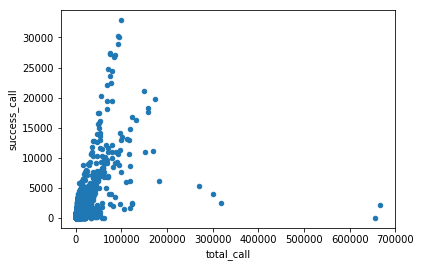

In [22]:
x.plot(x='total_call',y='success_call',kind='scatter')

In [47]:
X.index.unique()

Index(['2018-07-13', '2018-07-12', '2018-07-23', '2018-07-14', '2018-07-15',
       '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
       '2018-07-21', '2018-07-22', '2018-08-21', '2018-07-30', '2018-07-24',
       '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29',
       '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
       '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
       '2018-07-02', '2018-07-03', '2018-08-10', '2018-08-11', '2018-08-12',
       '2018-08-13', '2018-08-14', '2018-08-15', '2018-07-05', '2018-08-16',
       '2018-08-17', '2018-08-18', '2018-08-19', '2018-07-04', '2018-07-06',
       '2018-07-07', '2018-07-08', '2018-08-20', '2018-07-09', '2018-07-10',
       '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26',
       '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31',
       '2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',

In [245]:
def get_by_vendor(n_cluster,i_vendor):
    #filter by date
    X_lower = x[(x.index <= '2018-09-01') & (x.i_vendor == i_vendor )]
    X_lower = X_lower[['total_call','success_call','total_duration']]
    X_upp = x[(x.index >= '2018-09-01') & (x.i_vendor == i_vendor)]
    X_upp = X_upp[['total_call','success_call','total_duration']]
    kmeans = KMeans(n_clusters=n_cluster,random_state=0)
    kmeans.fit(X_lower)
    centroids = kmeans.cluster_centers_
    plt.scatter(X_lower.total_call,X_lower.success_call)
    plt.scatter(centroids[:,0],centroids[:,1],marker='x', s=169, linewidths=3,color='r', zorder=10)
    plt.title("Lower DATA Centroid Points")
    preds = X_upp
    preds['preds'] = kmeans.predict(X_upp)
    seaborn.lmplot(x='total_call',y='success_call',data=preds, hue='preds',  aspect=1.61,fit_reg=False)
    return preds

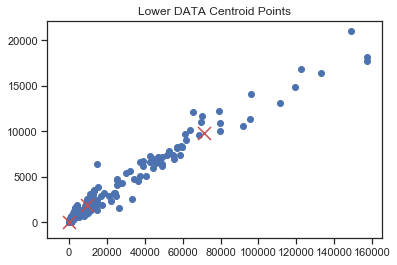

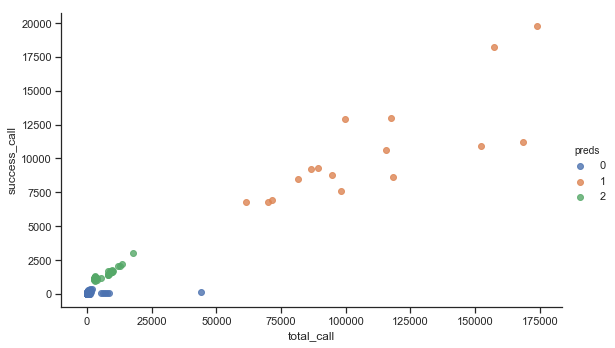

In [243]:
get_by_vendor(3,406)

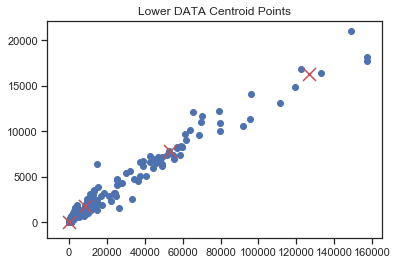

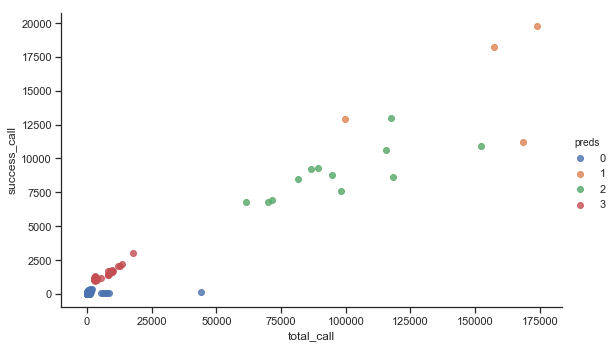

In [251]:
preds_23 = get_by_vendor(4,406)

In [252]:
preds_23[preds_23.preds == 0]

,total_call,success_call,total_duration,preds
summary_date,,,,
2018-09-01,23,11,5512.0,0
2018-09-01,283,4,384.0,0
2018-09-01,116,32,10610.0,0
2018-09-01,41,23,15247.0,0
2018-09-01,1,0,0.0,0
2018-09-01,31,7,2571.0,0
2018-09-01,13,0,0.0,0
2018-09-01,21,9,295.0,0
2018-09-01,148,13,3056.0,0


In [140]:
#filter by date
X_lower = x[(x.index <= '2018-09-01') & (x.i_vendor == 406 )]

In [177]:
X_upp = x[(x.index >= '2018-09-01') & (x.i_vendor == 406)]
X_upp = X_upp[['total_call','success_call','total_duration']]

In [143]:
X_lower = X_lower[['total_call','success_call','total_duration']]

In [22]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [173]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_lower)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [164]:
from scipy.spatial.distance import cdist

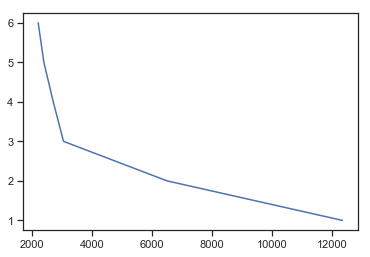

In [171]:
#calculate elbow
Nc = [1,2,3,4,5,6]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [np.average(np.min(cdist(X_lower, kmeans[i].fit(X_lower).cluster_centers_, 'euclidean'), axis=1)) for i in range(len(kmeans))]
plt.plot(score,Nc)

In [174]:
centroids = kmeans.cluster_centers_

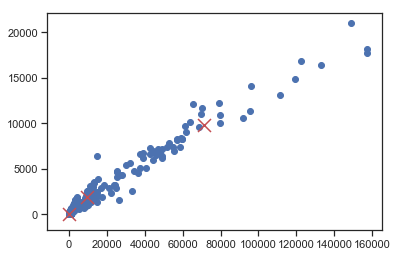

In [175]:
plt.scatter(X_lower.total_call,X_lower.success_call)
plt.scatter(centroids[:,0],centroids[:,1],marker='x', s=169, linewidths=3,color='r', zorder=10)

In [147]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [178]:
kmeans.predict(X_upp)

array([2, 1, 0, ..., 0, 0, 0])

In [179]:
preds = X_upp

In [180]:
preds['preds'] = kmeans.predict(X_upp)

In [181]:
import seaborn
seaborn.set(style='ticks')

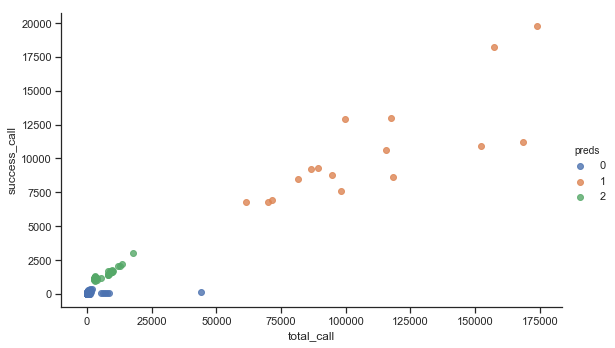

In [182]:
seaborn.lmplot(x='total_call',y='success_call',data=preds, hue='preds',  aspect=1.61,fit_reg=False)

In [183]:
df.groupby(by='i_vendor').count()['i_summary'].sort_values(ascending=False).head(10)

i_vendor
406    33864
23     28623
26     28084
32     22686
403    14934
5      14892
388    12414
293    11822
380    10287
181     8349
Name: i_summary, dtype: int64

In [207]:
kmeans.predict(np.array([[9891,1713,300000]]))

array([2])

In [192]:
X_upp.values

array([[3.17300e+03, 1.20700e+03, 3.59813e+05, 2.00000e+00],
       [1.57185e+05, 1.81980e+04, 3.19229e+06, 1.00000e+00],
       [2.30000e+01, 1.10000e+01, 5.51200e+03, 0.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]])

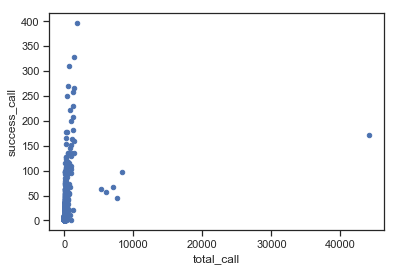

In [212]:
preds[preds.preds==0].plot(x='total_call',y='success_call',kind='scatter')

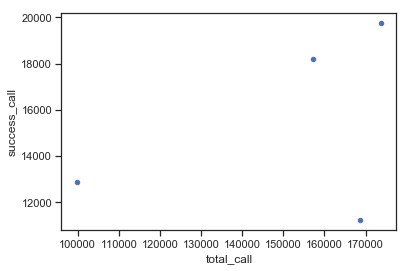

In [157]:
preds[preds.preds==1].plot(x='total_call',y='success_call',kind='scatter')

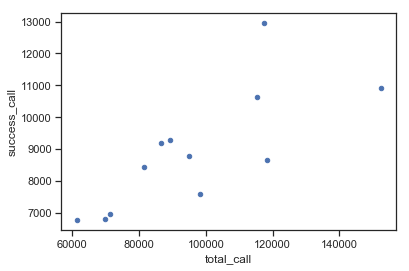

In [158]:
preds[preds.preds==2].plot(x='total_call',y='success_call',kind='scatter')

In [214]:
from sklearn.decomposition import PCA

In [215]:
#pca
X_lower.head()

,total_call,success_call,total_duration
summary_date,,,
2018-07-13,2,0,0.0
2018-07-12,5,2,244.0
2018-07-12,53,12,1771.0
2018-07-12,40679,5128,1001850.0
2018-07-12,6104,968,309086.0
